In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist


In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.
x_test  = x_test.astype("float32") / 255.

# Reshape to (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [4]:
input_img = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2,2), padding="same")(x)

x = layers.Conv2D(16, (3,3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2,2), padding="same")(x)


In [5]:
x = layers.Conv2D(16, (3,3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2,2))(x)

x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2,2))(x)

decoded = layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)


In [6]:
autoencoder = models.Model(input_img, decoded)
autoencoder.summary()

autoencoder.compile(optimizer="adam", loss="mse")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0616 - val_loss: 0.0155
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0143 - val_loss: 0.0119
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0104 - val_loss: 0.0097
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 9/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 10/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0074 - val_loss: 0.0072


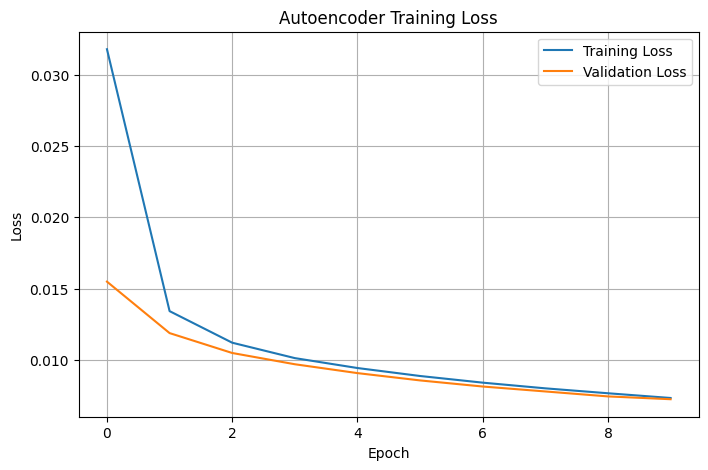

In [8]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
reconstructed = autoencoder.predict(x_train)
train_loss = np.mean(np.power(x_train - reconstructed, 2), axis=(1,2,3))

print("Mean Reconstruction Loss:", np.mean(train_loss))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Mean Reconstruction Loss: 0.007264607


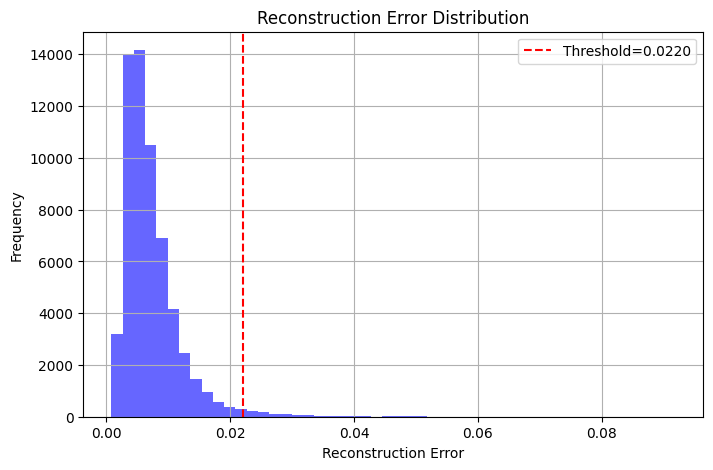

Threshold: 0.021995256


In [10]:
threshold = np.mean(train_loss) + 3*np.std(train_loss)

plt.figure(figsize=(8,5))
plt.hist(train_loss, bins=50, alpha=0.6, color="blue")
plt.axvline(threshold, color="red", linestyle="--", label=f"Threshold={threshold:.4f}")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

print("Threshold:", threshold)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


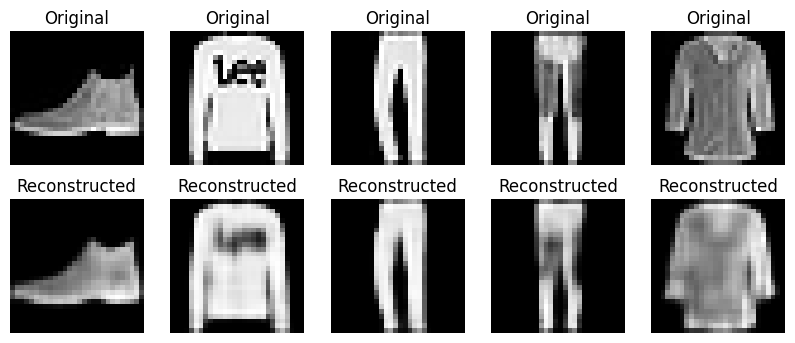

In [11]:
n = 5
plt.figure(figsize=(10,4))

for i in range(n):
    # original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # reconstructed
    ax = plt.subplot(2, n, i+1+n)
    pred = autoencoder.predict(x_test[i].reshape(1,28,28,1))
    plt.imshow(pred.reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()


In [12]:
autoencoder.save("autoencoder_model.keras")
np.save("threshold.npy", threshold)

print("Model & threshold saved successfully.")





Model & threshold saved successfully.


In [13]:
import os

for file in os.listdir('/content'):
    print(file)


.config
autoencoder_model.keras
test.jpg
threshold.npy
sample_data


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load saved autoencoder and threshold
model = tf.keras.models.load_model("autoencoder_model.keras")
threshold = float(np.load("threshold.npy"))
print("Loaded Threshold:", threshold)



Loaded Threshold: 0.02199525572359562


In [15]:
def preprocess(img_path):
    img = Image.open(img_path).convert("L")  # grayscale
    img = img.resize((28, 28))              # match training size
    img = np.array(img).astype("float32") / 255.
    img = img.reshape(1, 28, 28, 1)
    return img


In [16]:
def reconstruction_error(original, reconstructed):
    return np.mean(np.power(original - reconstructed, 2))


In [17]:
def detect_anomaly(img_path):
    # preprocess
    img = preprocess(img_path)

    # reconstruction
    reconstructed = model.predict(img)

    # compute error
    error = reconstruction_error(img, reconstructed)

    # classify
    status = "ANOMALY " if error > threshold else "NORMAL "

    return error, reconstructed, status


In [18]:
img_path = "/content/test.jpg"
error, recon, status = detect_anomaly(img_path)

print("Reconstruction Error:", error)
print("Prediction:", status)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
Reconstruction Error: 0.018938871
Prediction: NORMAL 


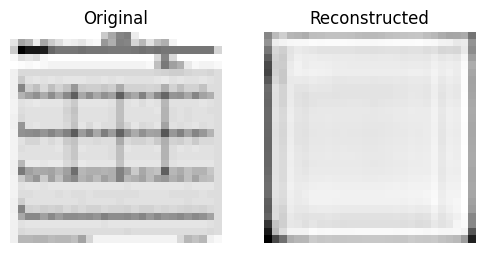

In [19]:
plt.figure(figsize=(6,3))

# Original
plt.subplot(1, 2, 1)
plt.imshow(preprocess(img_path).reshape(28, 28), cmap="gray")
plt.title("Original")
plt.axis("off")

# Reconstructed
plt.subplot(1, 2, 2)
plt.imshow(recon.reshape(28, 28), cmap="gray")
plt.title("Reconstructed")
plt.axis("off")

plt.show()


In [20]:
import os
os.listdir()


['.config',
 'autoencoder_model.keras',
 'test.jpg',
 'threshold.npy',
 'sample_data']

In [35]:
files.download("autoencoder_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>